In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import imageio
plt.close('all')
import random
import os

In [2]:
def prob(x0,y0,x,y,a,A):
    r=np.sqrt((x-x0)**2+(y-y0)**2)
    if r==0:
        return 1
    else:
        p=A*np.exp(-(r**a))#A/(r**(a))
        #print(p)
        return p
   
    
def makec(p):
    p=int(p*100)
    t=np.random.random_integers(100)
    #print(t,p)
    if p>t:
        return True
    else:
        return False
    
    
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = (r * a + (1.0 - a) * R) /255
    rgb[:,:,1] = (g * a + (1.0 - a) * G) /255
    rgb[:,:,2] = (b * a + (1.0 - a) * B) /255

    return np.asarray( rgb, dtype='uint8' )


def circle(x0,y0,r):
    
    x1=np.linspace(x0-r,x0+r,3000,endpoint=True)
    x2=np.linspace(x0-r,x0+r,3000,endpoint=True)
    y1=np.sqrt(r**2-(x1-x0)**2)+y0
    y2=-1*np.sqrt(r**2-(x1-x0)**2)+y0
    x=np.append(x1,x2)
    y=np.append(y1,y2)
        
    return x,y 

def circletest(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=np.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    #print('d',d,r1,r0)
    
    # non intersecting
    if d > r0 + r1 and r0 != r1:
        #print('1')
        return 0
    # One circle within other
    if d < abs(r0-r1):
        #print('2')
        return 1
    # coincident circles
    if d == 0 and r0 == r1:
        #print('3')
        return 0
    else:
        #print('4')
        return 1

    
def splitprob(r,low,high):
    if r <= low:
        diff = 0
    else:
        diff = ((1/(high-low))**3 * (r-low)**3)*100
    return 100-diff
    
def circletest_array(x0, y0, r0):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1
    c_m=np.zeros((len(x0),len(x0)))
    
    
    for i in range(len(x0)):
         for j in range(len(x0)):
                c_m[i,j]=circletest(x0[i], y0[i], r0[i], x0[j], y0[j], r0[j])
    
    #print('sum',np.sum(c_m))
    return np.sum(c_m)
    
def ini_pic(b,r_i,pix,t,run,bg=False):
    #plt.style.use("dark_background")
    #plt.rcParams['axes.facecolor'] = 'black'
    my_dpi=96
    n=pix
    
    if not os.path.isdir('./'+str(run)):
        os.mkdir('./'+str(run))
        os.mkdir('./'+str(run)+'_GT')
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    
    r=r_i/pix
    
    
    
    
    x_pos=np.linspace(1.5*r,1-1.5*r,500)
    y_pos=np.linspace(1.5*r,1-1.5*r,500)

    x=np.array([])
    y=np.array([])
    x0c=np.array([2])
    y0c=np.array([0.5])
    rc=np.array([0])
    split_prob=np.array([0])
    g=0
    while g<b:
        r=r_i/pix
        x0=np.random.choice(x_pos)
        y0=np.random.choice(y_pos)
        r_e=np.random.random_integers(15)
        r=r*(1+(r_e/100))
        s=np.array([])




        if g > 0:
            if g==1:
                if circletest(x0, y0, r, x0c[0], y0c[0], rc[0])==0:
                    x0c=np.append(x0c,x0)
                    y0c=np.append(y0c,y0)
                    rc=np.append(rc,r)
                    split_prob=np.append(split_prob,100-splitprob(r,0.035,0.06))
                    
                    
                    circ=plt.Circle((x0,y0), r, color='red',fill=False)
                    ax.add_patch(circ)
                    
                   
    

                    #x_c,y_c= circle(x0,y0,r)
                    #x=np.append(x,x_c)
                    #y=np.append(y,y_c)
                    g=g+1
                else:
                    print('overlap',g)
                    g=g

            else:
                #print(g,x0c[g],x0)
                for j in range(1,g):
                    #print(circletest(x0, y0, r, x0c[g-j], y0c[g-j], rc[g-j]))
                    s=np.append(s,circletest(x0, y0, r, x0c[g-j], y0c[g-j], rc[g-j]))
                    #print(g,g-j,x0c[g-j],x0,x0c[g])
                if np.sum(s)==0:

                    x0c=np.append(x0c,x0)
                    y0c=np.append(y0c,y0)
                    rc=np.append(rc,r)
                    split_prob=np.append(split_prob,100-splitprob(r,0.035,0.06))
                    
                    circ=plt.Circle((x0,y0), r, color='red',fill=False)
                    ax.add_patch(circ)
                    
                    #xsquare=np.random.choice(x_pos)
                    #ysquare=np.random.choice(y_pos)
                    #rec = plt.Rectangle((xsquare,ysquare), 3*r, 2*r, fc='white',ec="red")
                    #ax.add_patch(rec)

                    #x_c,y_c= circle(x0,y0,r)
                    #x=np.append(x,x_c)
                    #y=np.append(y,y_c)
                    g=g+1
                else:
                    print('overlap',g)
                    g=g

        else:

            x0c=np.append(x0c,x0)
            y0c=np.append(y0c,y0)
            rc=np.append(rc,r)
            
            split_prob=np.append(split_prob,100-splitprob(r,0.035,0.06))


            #x_c,y_c= circle(x0,y0,r)
            #x=np.append(x,x_c)
            #y=np.append(y,y_c)
            
            circ=plt.Circle((x0,y0), r, color='red',fill=False)
            ax.add_patch(circ)
            
            g=g+1
            
            
    plt.gca().set_aspect('equal', adjustable='box')
    
    
    
    
    
    
    
   


    plt.axis('off')

    #plt.scatter(x,y,s=pix**2/n**2,c='red')
    
    
    
    #for v in range(1):
   
    #plt.tick_params(
    #axis='both',          # changes apply to the x-axis
    #which='both',      # both major and minor ticks are affected
    #bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    #labelbottom=False) # labels along the bottom edge are off
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.savefig('./'+str(run)+'/'+str(t)+'.png',dpi=my_dpi,transparent=False)
    plt.close()
    
    r_count=np.unique(rc)
    
    ide = np.append(-1,np.arange(1,b+1))
    
    if len(r_count) < b:
        print('!!!!!!!!!!!!!!!!!',len(r_count))
        x0c, y0c, rc,ide,split_prob = ini_pic(b,r_i,pix,t,run,bg=False)



    return x0c, y0c, rc,ide,split_prob
    

def gt(x,y,r,t,run,ide,split_prob,split_id=0,savefile=True,shuffle=False):
    
    
    #plt.rcParams['axes.facecolor'] = 'black'
    my_dpi=96
    
    #print('r',r,np.mean(r))


    t_v=np.ones(len(x))*t
    
    if t==0:
        split_id=np.zeros(len(x))
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    c = ['#e43b1a','#4a7d5c', '#e5cb14', "#281a32",'#f5b8bc','#d2d7da','#346fb6','#c76b69','#2e2f44','#ca7413']

    
    for i in range(len(x)):
        u=np.random.random_integers(9)
        circ=plt.Circle((x[i], y[i]), r[i], color=c[1],fill=True)
        #circ=plt.Circle((x[i], y[i]), r[i], color='black',fill=True)
        ax.add_patch(circ)
    
    plt.axis('off')
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    #plt.savefig('./'+str(run)+'_GT'+'/'+str(t)+'.png',dpi=my_dpi,transparent=False)
    
    if shuffle:
        ind = np.argsort(x) 
        #print('ind',ind)
        random.shuffle(ind)
        #print('ind',ind)
        
        #print('x',x)
        #print('y',y)
        x= np.take_along_axis(x, ind, axis=-1)  
        #print('x2',x)
        
        y=np.take_along_axis(y, ind, axis=-1) 
        
        #print('y2',y)
        #print('ind2',ind)
        r=np.take_along_axis(r, ind, axis=-1)
        ide=np.take_along_axis(ide, ind, axis=-1)
        split_id=np.take_along_axis(split_id, ind, axis=-1)
        split_prob=np.take_along_axis(split_prob, ind, axis=-1)
    
    
    
    if savefile:
        if t==0:
            np.savetxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt', np.c_[x,y,r,ide,split_id,split_prob,t_v],delimiter='\t',header='x'+'\t'+'y'+'\t'+'r'+'\t'+'id'+'\t'+'split_id'+'\t'+'s_prob'+'\t'+'t')
        else:    
            xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
            
            xl=np.append(xl,x)
            yl=np.append(yl,y)
            rl=np.append(rl,r)
            t_vl=np.append(t_vl,t_v)
            idel=np.append(idel,ide)
            split_l=np.append(split_l,split_id)
            s_pr_l=np.append(s_pr_l,split_prob)
            np.savetxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt', np.c_[xl,yl,rl,idel,split_l,s_pr_l,t_vl],delimiter='\t',header='x'+'\t'+'y'+'\t'+'r'+'\t'+'id'+'\t'+'split_id'+'\t'+'s_prob'+'\t'+'t')
    plt.close()

def move(x,y,r,mv,t,pix,run,ide,reco=True,forget=True,directed=0):
    
    
    vec=np.linspace(0,2*np.pi,500)
    
    my_dpi=96
    n=pix
    my_dpi=96
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    
    plt.axis('off')
    
    plt.gca().set_aspect('equal', adjustable='box')
    ax = fig.gca()
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    
    rec_flag=False
    xrec_l=[]
    yrec_l=[]
    rrec_l=[]
    for m in range(3):
        
        misdetect=np.random.random_integers(99)
        
        #print('m',m,misdetect,rec)
        if t==30:
            m_lim=120
        else:
            m_lim=120 #82
    
        if misdetect >= m_lim and reco==True:
            
            coord=np.linspace(0,1,num=500)
            xrec=np.random.choice(coord)
            yrec=np.random.choice(coord)
            rrec=np.random.choice(coord)*10
            #rec=plt.Rectangle((xrec,yrec), rrec*10**(-2), rrec*10**(-2),fc=None,ec="blue") 
            rec=plt.Circle((xrec,yrec), rrec*10**(-2), color='red',fill=False)
            ax.add_patch(rec)
            
            xrec_l.append(xrec)
            yrec_l.append(yrec)
            rrec_l.append(rrec)
            
            print('rec!',len(xrec_l))
           
            
            rec_flag=True

    
    #xp=np.array([0,1])
    #yp=np.array([0,1])
    
    pl=True
    
    

        

    re = np.array([])
    x0c=np.array([])
    y0c=np.array([])
    r0c=np.array([])
    idec=np.array([])
    split_id=np.array([])
    split_prob=np.array([])
    flag=0
    
    
    
    
    #overlap=True
   
    #while overlap:

        #x0c=np.array([])
        #y0c=np.array([])
        #r0c=np.array([])
        #idec=np.array([])
        #split_id=np.array([])
        #flag=0
        #plt.gca().set_aspect('equal', adjustable='box')
        #ax = fig.gca()
       
    for i in range(len(x)):
        x_ra=np.random.random_integers(10)
        y_ra=np.random.random_integers(10)
        phi=np.random.choice(vec)
        if directed > 0:
            v=mv*1.25
            x_n,y_n = dir_mov(x[i],y[i],directed,v,x_ra,y_ra,mv,phi,t,g=[0.5,0.5])
        else:
            x_n=x[i]+(x_ra/10)*mv*np.sin(phi)
            y_n=y[i]+(y_ra/10)*mv*np.cos(phi)
        
        
        r_e0=np.random.randint(0, 2)
        if r[i] < 0.028:
            r_e0 = np.random.random_integers(45,55)
            
        re=np.append(re,r_e0)
        #print('ri0',r[i])
        r[i] = r[i]*(1+(r_e0/100))
        #print('ri1',r[i])

        if x_n < 0 or x_n > 1:
            x_n=x[i]-mv*np.sin(phi)

        if y_n < 0 or y_n > 1:
            y_n=y[i]-mv*np.cos(phi)


        sp=np.random.random_integers(99)
        print('ri',r[i])
        if sp>=98 and t>7 and r[i]>0.035:###splitprob(r[i],0.035,0.06): ###96
            #print(r[i],'split',splitprob(r[i],0.035,0.06))
            flag=flag+1
            d=0.9
            x_n1, y_n1, x_n2, y_n2 = split_cell_axis(x_n, y_n, r[i], d)
            
            
            #x_n1=x_n-1.05*r[i]
            #x_n2=x_n+1.05*r[i]


            #r_e=np.random.random_integers(5)

            #r_n1= r[i]*(1+(r_e/100))
            #r_n2= r[i]*(1-(r_e/100))

            #print('r_n1')
            #r_e1=np.random.random_integers(15,40)
            #r_e2=np.random.random_integers(15,40)
            
            r_e1=np.random.random_integers(85,95)
            r_e2=np.random.random_integers(85,95)

            z=0
            while z<100:


                r_n1= r[i]*(1-(r_e1/100))
                r_n2= r[i]*(1-(r_e2/100))
                #print('r_n1',r_n1)
                #print('r_n2',r_n2)
                if r_n1 in r or r_n2 in r:
                    #print('while',r)
                    r_e1=np.random.random_integers(85,95)
                    r_e2=np.random.random_integers(85,95)
                    #print('r_e',r_e)
                    #r_n1= r[i]*(1+(r_z/100))+r_n1/100
                    #r_n2= r[i]*(1-(r_z/100))+r_n2/100


                    #print()
                    z=z+1
                else:

                    break


            circ1=plt.Circle((x_n1,y_n1), r_n1, color='red',fill=False)
            circ2=plt.Circle((x_n2,y_n2), r_n2, color='red',fill=False)
            ax.add_patch(circ1)
            ax.add_patch(circ2)
            x0c=np.append(x0c,x_n1)
            y0c=np.append(y0c,y_n1)
            x0c=np.append(x0c,x_n2)
            y0c=np.append(y0c,y_n2)

            split_id=np.append(split_id,ide[i])
            split_id=np.append(split_id,ide[i])
            
            split_prob=np.append(split_prob,100-splitprob(r_n1,0.035,0.06))
            split_prob=np.append(split_prob,100-splitprob(r_n2,0.035,0.06))


            if len(idec)!=0:
                max_id=np.max(np.append(ide,idec))
            else:
                max_id=np.max(ide)


            idec=np.append(idec,max_id+1)
            idec=np.append(idec,max_id+2)

            r0c=np.append(r0c,r_n1)
            r0c=np.append(r0c,r_n2)
        else:
            #print(r[i],'nosplit',splitprob(r[i],0.035,0.06))
            split_id=np.append(split_id,0)
            circ=plt.Circle((x_n,y_n), r[i], color='red',fill=False)
            ax.add_patch(circ)
            x0c=np.append(x0c,x_n)
            y0c=np.append(y0c,y_n)
            r0c=np.append(r0c,r[i])
            split_prob=np.append(split_prob,100-splitprob(r[i],0.035,0.06))

            idec=np.append(idec,ide[i])

    #x_c,y_c= circle(x[i],y[i],r[i])
    #xp=np.append(xp,x_c)
    #yp=np.append(yp,y_c)

    if circletest_array(x0c, y0c, r0c)==0:
        pass

    else:
        x0c, y0c, r0c,idec,split_id,split_prob=move(x,y,r/(1+(re/100)),mv,t,pix,run,ide,reco=False,forget=False,directed=directed)
        pl=False
        plt.close()

                
    
    
    
    
    n_miss=0
        
    #plt.scatter(xp,yp,s=pix**2/n**2,c='blue')
    
    if pl != False:
        plt.savefig('./'+str(run)+'/'+str(t)+'.png',dpi=my_dpi,transparent=False) 
        plt.close()
    
    #print('r0c',r0c)
    
    if rec_flag:
        n_miss=len(xrec_l)
        for k in range(len(xrec_l)):
            
            xrec=xrec_l[k]
            yrec=yrec_l[k]
            rrec=rrec_l[k]
            
            x0c=np.append(x0c,xrec)
            y0c=np.append(y0c,yrec)
            r0c=np.append(r0c,rrec*10**(-2))
            #print('rec_split',rrec,100-splitprob(rrec*10**(-2),0.035,0.06))
            split_prob=np.append(split_prob,100-splitprob(rrec*10**(-2),0.035,0.06))
            split_id=np.append(split_id,-1)
            idec=np.append(idec,-2)
            
    
    if forget:
        x_f, y_f, r_f,idec_f,split_id_f,split_prob_f=move_forget(x0c, y0c, r0c,idec,split_id,split_prob,n_miss,t,pix,run,pl=True,forgetting=forget)    
        return x0c, y0c, r0c,idec,split_id,split_prob,x_f, y_f, r_f,idec_f,split_id_f,split_prob_f
    
    else:
        return x0c, y0c, r0c,idec,split_id,split_prob
        

#plt.ioff()      



def move_forget(x, y, r,idec,split_id,split_prob,m,t,pix,run,pl=True,forgetting=True):
    
    
    if forgetting == False or t==0:
        return x, y, r,idec,split_id,split_prob

    else:
        my_dpi=96
        n=pix
        fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    
        plt.axis('off')
    
        plt.gca().set_aspect('equal', adjustable='box')
        ax = fig.gca()
        plt.xlim(0,1)
        plt.ylim(0,1)
    
        forget=np.random.random_integers(99,size=len(x))

        #print('f',forget)
        lim= 120#94  #120 #!!!!!!!no forget!!!
        
        x_f=x[forget<lim]
        y_f=y[forget<lim]
        r_f=r[forget<lim]
        idec_f=idec[forget<lim]
        split_id_f=split_id[forget<lim]
        split_prob_f=split_prob[forget<lim]
        
        
        
        

        x_f_c=x_f[split_id_f!=-1]
        y_f_c=y_f[split_id_f!=-1]
        r_f_c=r_f[split_id_f!=-1]
        idec_f_c=idec_f[split_id_f!=-1]
        split_id_f_c=split_id_f[split_id_f!=-1]
        split_prob_f_c=split_prob_f[split_id_f!=-1]
        
        x_f_r=x_f[split_id_f==-1]
        y_f_r=y_f[split_id_f==-1]
        r_f_r=r_f[split_id_f==-1]
        idec_f_r=idec_f[split_id_f==-1]
        split_id_f_r=split_id_f[split_id_f==-1]
        split_prob_f_r=split_prob_f[split_id_f==-1]


        for i in range(len(x_f_c)):
            circ1=plt.Circle((x_f_c[i],y_f_c[i]), r_f_c[i], color='red',fill=False)
            ax.add_patch(circ1)

        for j in range(len(x_f_r)):
            #rec=plt.Rectangle((x_f_r[j],y_f_r[j]), r_f_r[j], r_f_r[j],fc=None,ec="blue") 
            rec=plt.Circle((x_f_r[j],y_f_r[j]), r_f_r[j], color='red',fill=False)
            ax.add_patch(rec)  

        plt.savefig('./'+str(run)+'/'+str(t)+'.png',dpi=my_dpi,transparent=False) 
        plt.close()

        return x_f, y_f, r_f,idec_f,split_id_f,split_prob_f
    
def dir_mov(x,y,directed,v,x_ra,y_ra,mv,phi,t,g):
    ran = np.random.random_integers(99)
    
    if directed*100 > ran and t < 20:
        diff = np.array(g)-np.array([x,y])
        
        
        
        diff_norm=diff/np.max(np.abs(diff))
        #print('diff',diff,np.array([x,y]),diff_norm)
        
        
        x_n=x+diff_norm[0]*v
        y_n=y+diff_norm[1]*v
        
        
    else:
        x_n=x+(x_ra/10)*mv*np.sin(phi)
        y_n=y+(y_ra/10)*mv*np.cos(phi)
    return x_n,y_n




def split_cell_axis(x_n, y_n, r, d):
    """
    Calculates new positions for the daughter cells of a splitting cell.

    Parameters:
    x_n (float): x position of the parent cell
    y_n (float): y position of the parent cell
    r (float): radius of the parent cell
    theta (float): orientation angle of the split in radians

    Returns:
    tuple: new x and y positions for both daughter cells
    """
    theta = random.uniform(0, 2 * np.pi)
    
    # Displacement along the axis
    delta_x = d * r * np.cos(theta)
    delta_y = d * r * np.sin(theta)

    x_n1 = x_n - delta_x
    y_n1 = y_n - delta_y

    x_n2 = x_n + delta_x
    y_n2 = y_n + delta_y

    return x_n1, y_n1, x_n2, y_n2



def adjust_radius(filepath):
    # Read the data from the file
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Remove header and store it
    header = lines.pop(0)

    # Process data lines
    data = [list(map(float, line.split())) for line in lines]

    # Find parent cells of all splits
    split_parents = {}
    for line in data:
        split_id = int(line[4])
        if split_id != 0:
            split_parents[split_id] = int(line[6])  # key = split_id, value = split time

    # Adjust radius for each parent cell
    for parent_id, split_time in split_parents.items():
        for line in data:
            cell_id = int(line[3])
            time = int(line[6])

            if cell_id == parent_id:
                if time == split_time - 6:
                    initial_radius = line[2]
                    half= random.uniform(1.6, 2.1)
                    quart = random.uniform(3.6, 4.2)
                if split_time - 6 <= time < split_time:
                    # Adjust the radius
                    
                    if split_time - 6 <= time <= split_time - 5:
                        line[2] = initial_radius / half
                    else:
                        line[2] = initial_radius / quart

    # Convert back to string format and write to file
    with open(filepath, 'w') as file:
        file.write(header)
        for line in data:
            str_line = "\t".join(map(str, line)) + '\n'
            file.write(str_line)

# Test the function


def plot_radius_over_time(filepath, cell_id):
    # Read the data from the file
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Remove header
    lines.pop(0)

    # Process data lines
    data = [list(map(float, line.split())) for line in lines]

    # Extract time and radius for the specified cell ID
    times = []
    radii = []
    for line in data:
        if int(line[3]) == cell_id:
            times.append(int(line[6]))
            radii.append(line[2])

    # Plot
    plt.plot(times, radii, marker='o', linestyle='-', color='b')
    plt.xlabel('Time')
    plt.ylabel('Radius')
    plt.title(f'Radius Over Time for Cell ID {cell_id}')
    plt.grid(True)
    plt.show()

# Test the function


In [3]:
a=np.array([4,4,5,3,1])
b=np.array([1,2,3,4,5])
print(a[1:])

[4 5 3 1]


In [4]:
#print(stop)
forget=True
combined_radii=[]
for i in range(1,3):
    print('iiiiiiiiiiiiii',i)
    t=31
    b=5
    r_i=5
    pix=150
    run=i
    if forget:
        x,y,r,ide,split_prob=ini_pic(b,r_i,pix,0,run)
    else:
        x_f, y_f, r_f,idec_f,split_prob_f=ini_pic(b,r_i,pix,0,run)
    gt(x,y,r,0,run,ide,split_prob)
    mv=0.02

    for l in range(1,t):
        
       
        x=x[ide>0]
        y=y[ide>0]
        r=r[ide>0]
        ide=ide[ide>0]
        
        
        if forget:
            x,y,r,ide,split_id,split_prob,x_f, y_f, r_f,idec_f,split_id_f,split_prob_f = move(x,y,r,mv,l,pix,run,ide,forget=forget,directed=0)
        else:
            x_f, y_f, r_f,idec_f,split_id_f,split_prob_f = move(x_f,y_f,r_f,mv,l,pix,run,idec_f,forget=forget,directed=0)
            
        print(l,len(x),ide)
        #x,y,r = ini_pic(b,r_i,pix,l,run)
        gt(x_f,y_f,r_f,l,run,idec_f,split_prob_f,split_id_f,shuffle=True)
    filepath='./'+str(i)+'_GT'+'/'+'pos_GT.txt'
    adjust_radius(filepath)
    data = np.loadtxt(filepath, delimiter='\t', skiprows=1, usecols=(2))
    combined_radii.extend(data)

iiiiiiiiiiiiii 1
ri 0.035350000000000006
ri 0.036333333333333336
ri 0.03434
ri 0.038043333333333325
ri 0.038000000000000006
1 5 [1. 2. 3. 4. 5.]


/tmp/ipykernel_116068/3106316507.py:133: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  r_e=np.random.random_integers(15)
/tmp/ipykernel_116068/3106316507.py:277: DeprecationWarning: This function is deprecated. Please call randint(1, 9 + 1) instead
  u=np.random.random_integers(9)
/tmp/ipykernel_116068/3106316507.py:352: DeprecationWarning: This function is deprecated. Please call randint(1, 99 + 1) instead
  misdetect=np.random.random_integers(99)
/tmp/ipykernel_116068/3106316507.py:415: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  x_ra=np.random.random_integers(10)
/tmp/ipykernel_116068/3106316507.py:416: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  y_ra=np.random.random_integers(10)
/tmp/ipykernel_116068/3106316507.py:442: DeprecationWarning: This function is deprecated. Please call randint(1, 99 + 1) instead
  sp=np.random.random_integers(99)
/tmp/ip

ri 0.035350000000000006
ri 0.03669666666666667
ri 0.03434
ri 0.038043333333333325
ri 0.038000000000000006
2 5 [1. 2. 3. 4. 5.]
ri 0.035703500000000006
ri 0.03669666666666667
ri 0.03434
ri 0.03842376666666666
ri 0.038380000000000004
3 5 [1. 2. 3. 4. 5.]
ri 0.036060535000000005
ri 0.03706363333333334
ri 0.03434
ri 0.03842376666666666
ri 0.038380000000000004
4 5 [1. 2. 3. 4. 5.]
ri 0.036060535000000005
ri 0.03743426966666667
ri 0.0346834
ri 0.038808004333333326
ri 0.03876380000000001
5 5 [1. 2. 3. 4. 5.]
ri 0.036060535000000005
ri 0.03780861236333334
ri 0.035030234
ri 0.03919608437666666
ri 0.03915143800000001
6 5 [1. 2. 3. 4. 5.]
ri 0.036421140350000006
ri 0.03780861236333334
ri 0.03538053634
ri 0.03919608437666666
ri 0.03954295238000001
7 5 [1. 2. 3. 4. 5.]
ri 0.036785351753500006
ri 0.03780861236333334
ri 0.0357343417034
ri 0.03958804522043333
ri 0.03993838190380001
8 5 [1. 2. 3. 4. 5.]
ri 0.036785351753500006
ri 0.03780861236333334
ri 0.036091685120434
ri 0.03998392567263766
ri 0.0399

/tmp/ipykernel_116068/3106316507.py:464: DeprecationWarning: This function is deprecated. Please call randint(85, 95 + 1) instead
  r_e1=np.random.random_integers(85,95)
/tmp/ipykernel_116068/3106316507.py:465: DeprecationWarning: This function is deprecated. Please call randint(85, 95 + 1) instead
  r_e2=np.random.random_integers(85,95)
/tmp/ipykernel_116068/3106316507.py:428: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  r_e0 = np.random.random_integers(45,55)


ri 0.036785351753500006
ri 0.03780861236333334
ri 0.007427668797785318
ri 0.006153632313033997
ri 0.03998392567263766
ri 0.03993838190380001
10 6 [1. 2. 6. 7. 4. 5.]
ri 0.03715320527103501
ri 0.03818669848696667
ri 0.011067226508700123
ri 0.009230448469550996
ri 0.03998392567263766
ri 0.03993838190380001
11 6 [1. 2. 6. 7. 4. 5.]
ri 0.03715320527103501
ri 0.03856856547183634
ri 0.01626882296778918
ri 0.014214890643108534
ri 0.04038376492936403
ri 0.04033776572283801
12 6 [1. 2. 6. 7. 4. 5.]
ri 0.03715320527103501
ri 0.038954251126554706
ri 0.023915169762650096
ri 0.02160663377752497
ri 0.040787602578657677
ri 0.04074114338006639
13 6 [1. 2. 6. 7. 4. 5.]
ri 0.03715320527103501
ri 0.03934379363782026
ri 0.03515529955109564
ri 0.03219388432851221
ri 0.040787602578657677
ri 0.04074114338006639
14 6 [1. 2. 6. 7. 4. 5.]
ri 0.03752473732374536
ri 0.03973723157419846
ri 0.03515529955109564
ri 0.03251582317179733
ri 0.04119547860444425
ri 0.041148554813867054
15 7 [8. 9. 2. 6. 7. 4. 5.]
ri 0.003

ri 0.03497407875618029
ri 0.03038636504612964
ri 0.03754986102882972
23 6 [1. 2. 3. 6. 7. 5.]
ri 0.03934379363782026
ri 0.042395397173282036
ri 0.043247544656465006
ri 0.03532381954374209
ri 0.030690228696590938
ri 0.03792535963911802
24 6 [1. 2. 3. 6. 7. 5.]
ri 0.03934379363782026
ri 0.042395397173282036
ri 0.043247544656465006
ri 0.03532381954374209
ri 0.03099713098355685
ri 0.038304613235509204
25 6 [1. 2. 3. 6. 7. 5.]
ri 0.03934379363782026
ri 0.04281935114501486
ri 0.043247544656465006
ri 0.03532381954374209
ri 0.03099713098355685
ri 0.038687659367864294
26 6 [1. 2. 3. 6. 7. 5.]
ri 0.03934379363782026
ri 0.04281935114501486
ri 0.043247544656465006
ri 0.03532381954374209
ri 0.03099713098355685
ri 0.039074535961542936
27 6 [1. 2. 3. 6. 7. 5.]
ri 0.03934379363782026
ri 0.04281935114501486
ri 0.043247544656465006
ri 0.03532381954374209
ri 0.03130710229339242
ri 0.039074535961542936
ri 0.03973723157419846
ri 0.04281935114501486
ri 0.043680020103029654
ri 0.035677057739179514
ri 0.03099

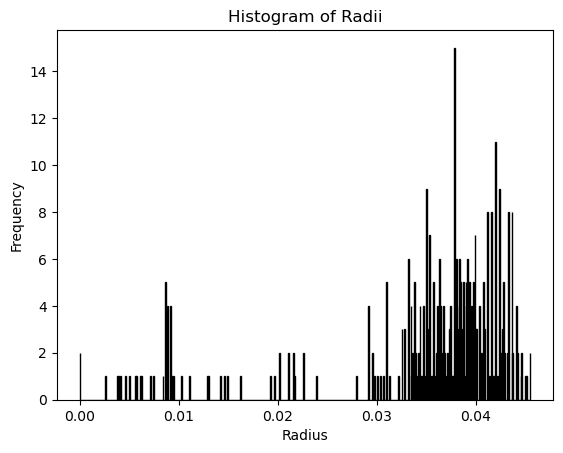

In [5]:
plt.hist(combined_radii, bins=500, edgecolor='k')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.title('Histogram of Radii')
plt.show()

# radius =  map_value_linear(value, 0.003, 0.45, 2, 8)

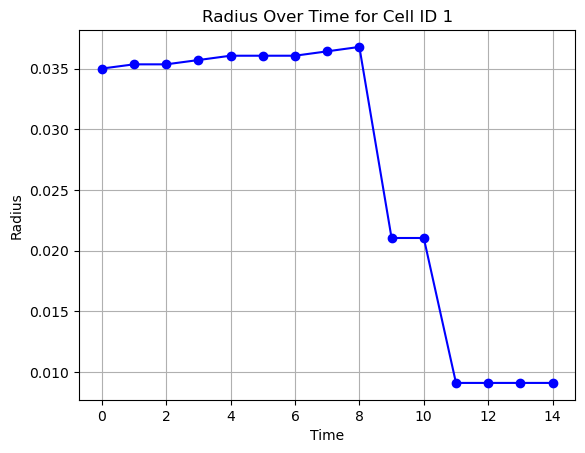

In [6]:
filepath = './'+str(1)+'_GT'+'/'+'pos_GT.txt'
cell_id = 1  # replace with your desired cell ID
plot_radius_over_time(filepath, cell_id)


In [7]:
x=0.034
c=0.03366667
b=[0.03366667,0.034,0.03466667]

print(x in b or c in b)

print(np.arange(1,4))

True
[1 2 3]


In [8]:
run=3
xl,yl,rl= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2), unpack=True)

x1=[]
y1=[]
x2_t=[]
y2_t=[]
x2=[]
y2=[]
x3=[]
y3=[]

for i in range(len(xl)):
    if i % 3 == 0:
        x1.append(xl[i])
        y1.append(yl[i])
        
    else:
        x2_t.append(xl[i])
        y2_t.append(yl[i])
        
for i in range(len(x2_t)):
    
    if i % 2 == 0:
        x2.append(x2_t[i])
        y2.append(y2_t[i])
        
    else:
        x3.append(x2_t[i])
        y3.append(y2_t[i])
        
        



plt.plot(x1,y1,c='red')
plt.plot(x2,y2,c='blue')
plt.plot(x3,y3,c='green')
plt.show()

FileNotFoundError: ./3_GT/pos_GT.txt not found.